In [1]:
import cv2
import os
import matplotlib.pyplot as plt

from src.enhancement import enhance_image
from src.size_detection import detect_grid_size
from src.segmentation import segment_and_extract
from src.thresholding import threshold_adaptive
from src.edge_detection import binary_edges


In [2]:
def show(title, img):
    plt.figure(figsize=(5,5))
    
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    plt.title(title)
    plt.axis('off')
    plt.show()


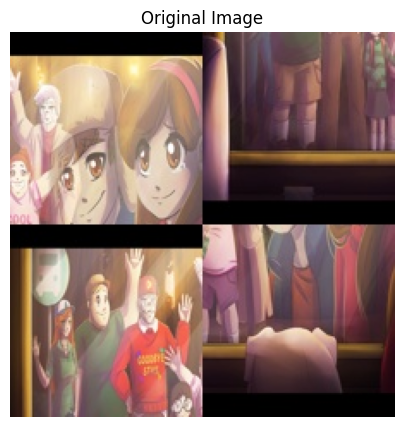

In [3]:
IMAGE_PATH = "data/raw/Gravity Falls/puzzle_2x2/1.jpg"   # 👈 CHANGE THIS

original = cv2.imread(IMAGE_PATH)
show("Original Image", original)


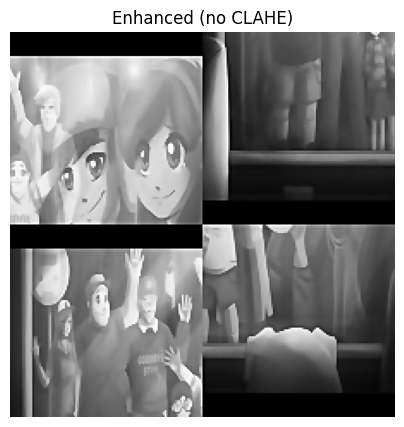

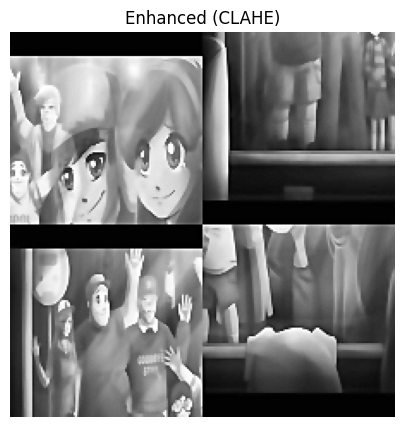

In [4]:
enhanced, enhanced_clahe = enhance_image(original)

show("Enhanced (no CLAHE)", enhanced)
show("Enhanced (CLAHE)", enhanced_clahe)


In [5]:
grid_size = 2
contour_img, cropped_pieces, piece_metadata = segment_and_extract(
    original, grid_size, "demo"
)



In [6]:
_, enhanced_pieces, _ = segment_and_extract(
    enhanced_clahe, grid_size, "demo"
)


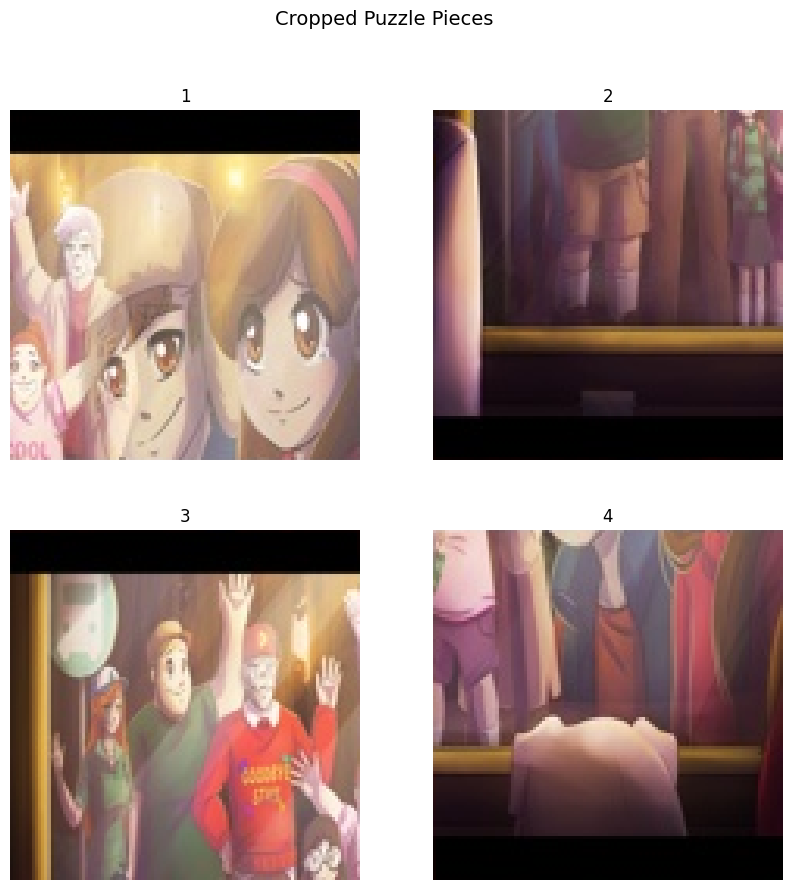

In [7]:
cols = grid_size
rows = grid_size

plt.figure(figsize=(10,10))

for i, piece in enumerate(cropped_pieces):
    plt.subplot(rows, cols, i+1)
    plt.imshow(cv2.cvtColor(piece, cv2.COLOR_BGR2RGB))
    plt.title(piece_metadata[i]['id'])
    plt.axis("off")

plt.suptitle("Cropped Puzzle Pieces", fontsize=14)
plt.show()


In [8]:
_, enhanced_pieces, _ = segment_and_extract(
    enhanced_clahe, grid_size, "demo"
)


In [9]:
from src.edge_detection import canny_edges
from src.thresholding import threshold_otsu


binary_pieces = []
edge_pieces = []

for piece in enhanced_pieces:
    binary = threshold_otsu(piece)
    edges  = canny_edges(piece)
    binary_pieces.append(binary)
    edge_pieces.append(edges)


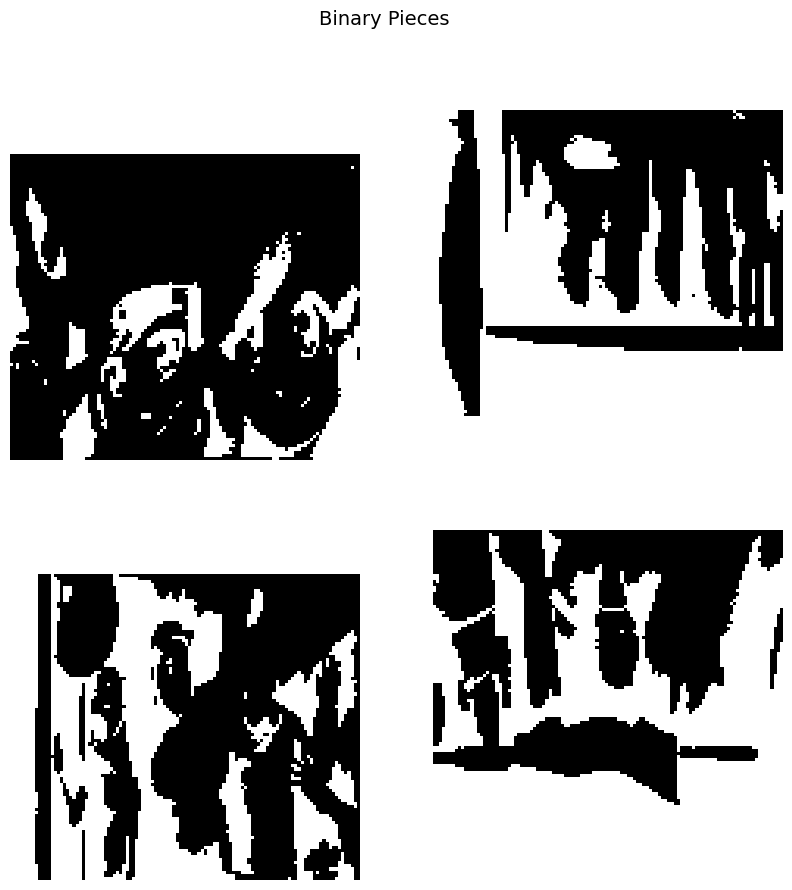

In [10]:
plt.figure(figsize=(10,10))

for i, img in enumerate(binary_pieces):
    plt.subplot(rows, cols, i+1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")

plt.suptitle("Binary Pieces", fontsize=14)
plt.show()


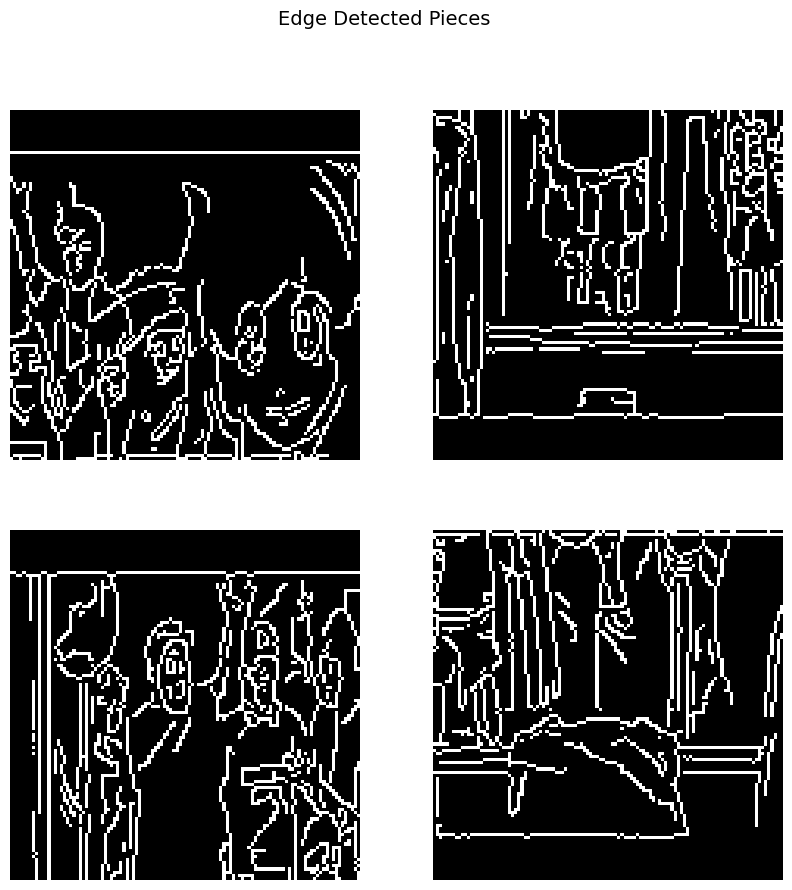

In [11]:
plt.figure(figsize=(10,10))

for i, img in enumerate(edge_pieces):
    plt.subplot(rows, cols, i+1)
    plt.imshow(img, cmap="gray")
    plt.axis("off")

plt.suptitle("Edge Detected Pieces", fontsize=14)
plt.show()
